In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
print(df.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


# EDA/Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


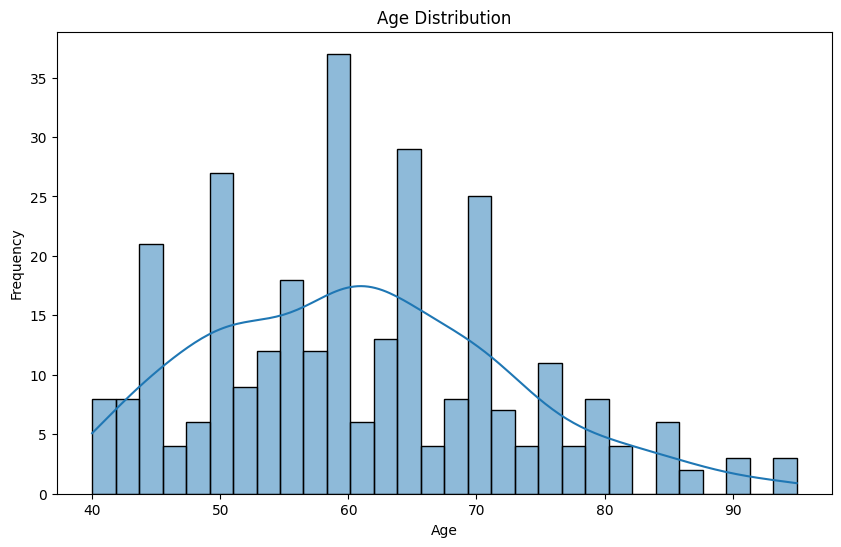

In [6]:
# Analisis Usia
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

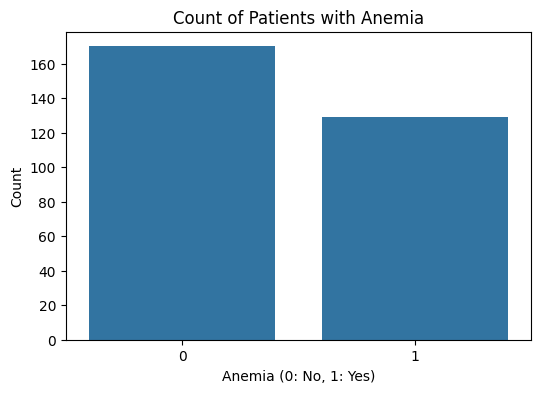

In [7]:
# Analisis Anemia
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='anaemia')
plt.title('Count of Patients with Anemia')
plt.xlabel('Anemia (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

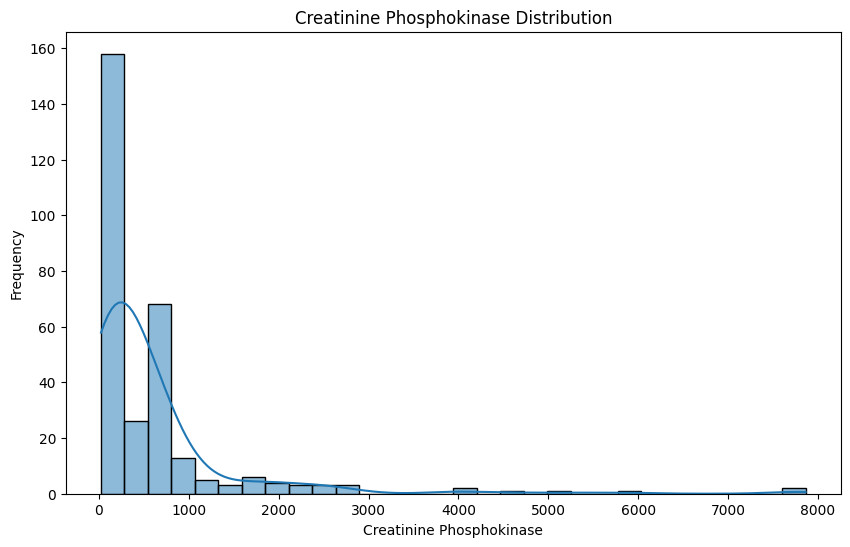

In [8]:
#  Analisis Kreatinin Fosfokinase
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='creatinine_phosphokinase', kde=True, bins=30)
plt.title('Creatinine Phosphokinase Distribution')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Frequency')
plt.show()

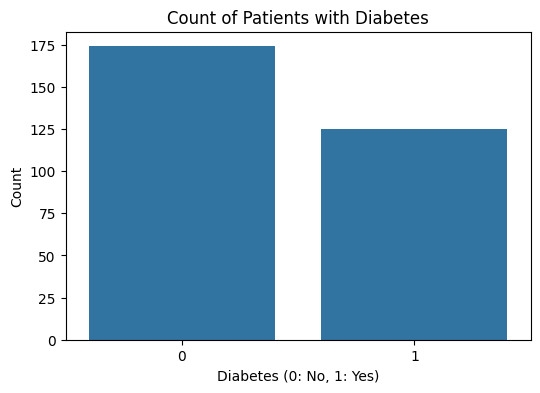

In [9]:
#  Analisis Diabetes
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diabetes')
plt.title('Count of Patients with Diabetes')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

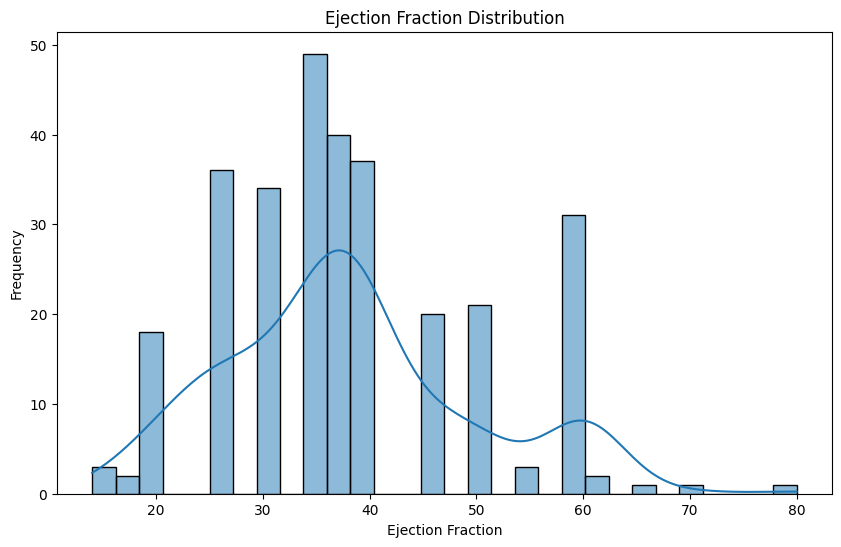

In [10]:
# Analisis Pecahan Ejeksi
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ejection_fraction', kde=True, bins=30)
plt.title('Ejection Fraction Distribution')
plt.xlabel('Ejection Fraction')
plt.ylabel('Frequency')
plt.show()

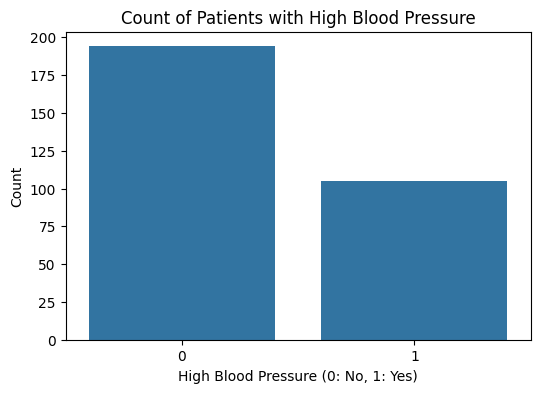

In [11]:
#  Analisis Tekanan Darah Tinggi
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='high_blood_pressure')
plt.title('Count of Patients with High Blood Pressure')
plt.xlabel('High Blood Pressure (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

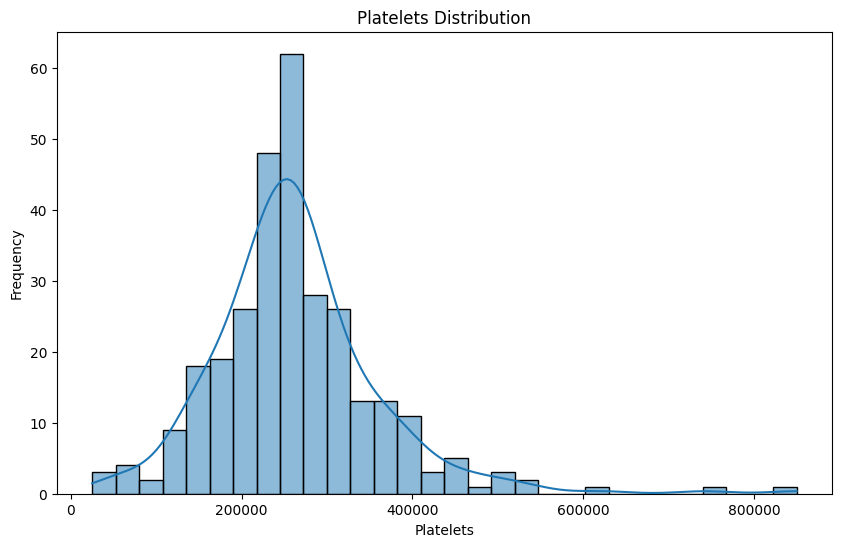

In [12]:
# Analisis Trombosit
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='platelets', kde=True, bins=30)
plt.title('Platelets Distribution')
plt.xlabel('Platelets')
plt.ylabel('Frequency')
plt.show()

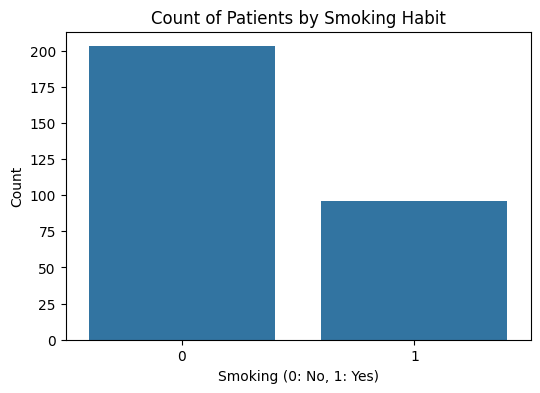

In [13]:
#  Analisis Kebiasaan Merokok
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='smoking')
plt.title('Count of Patients by Smoking Habit')
plt.xlabel('Smoking (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

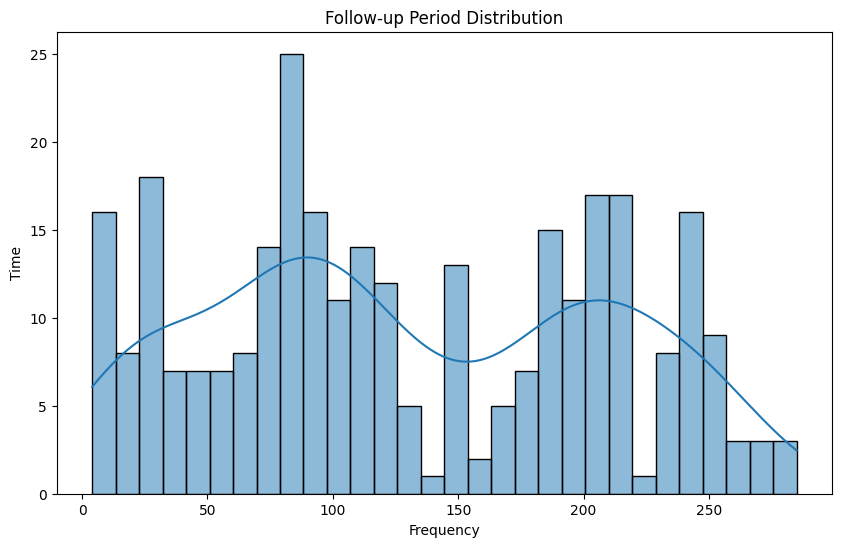

In [14]:
# Analisis Waktu
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time', kde=True, bins=30)
plt.title('Follow-up Period Distribution')
plt.ylabel('Time')
plt.xlabel('Frequency')
plt.show()

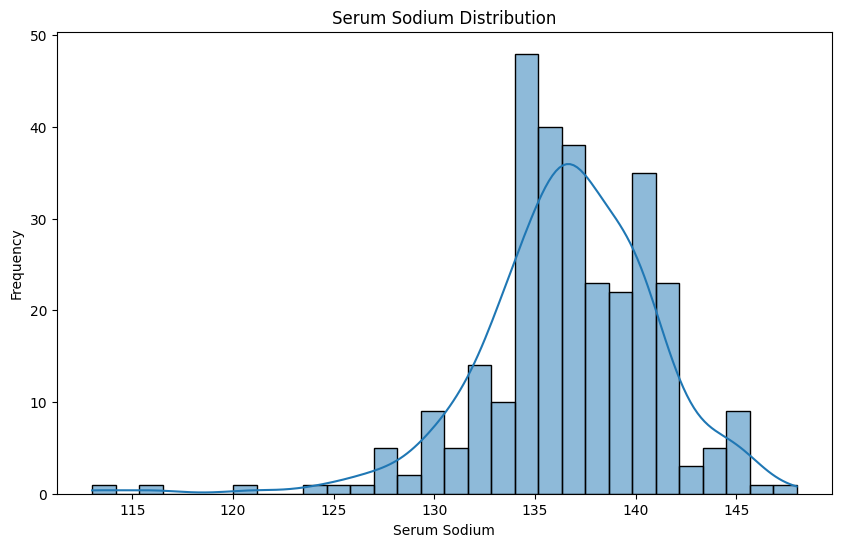

In [15]:
#Analisis Serum Natrium
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='serum_sodium', kde=True, bins=30)
plt.title('Serum Sodium Distribution')
plt.xlabel('Serum Sodium')
plt.ylabel('Frequency')
plt.show()

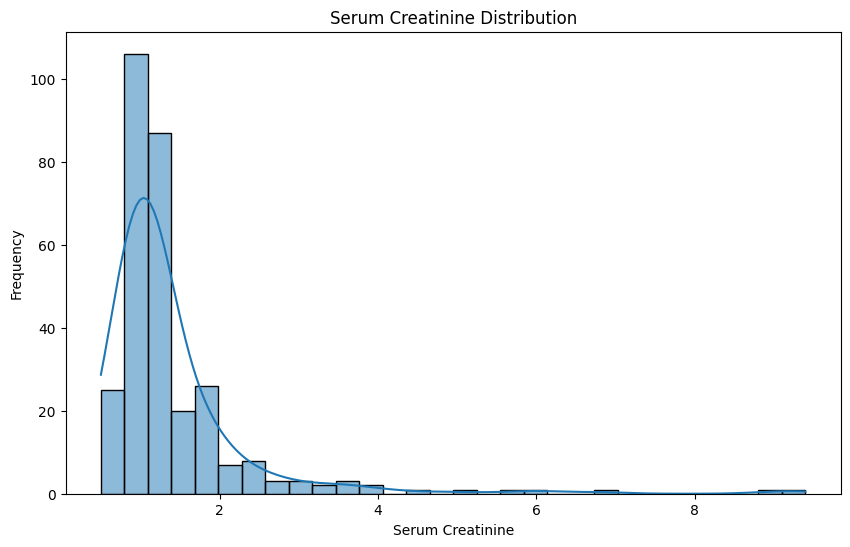

In [16]:
# Analisis Serum Kreatinin
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='serum_creatinine', kde=True, bins=30)
plt.title('Serum Creatinine Distribution')
plt.xlabel('Serum Creatinine')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Analisis deskriptif untuk fitur kunci
# Usia
print("Descriptive Analysis for Age:")
print("Mean Age:", df['age'].mean())
print("Median Age:", df['age'].median())
print("Minimum Age:", df['age'].min())
print("Maximum Age:", df['age'].max())
print("Standard Deviation of Age:", df['age'].std())

Descriptive Analysis for Age:
Mean Age: 60.83389297658862
Median Age: 60.0
Minimum Age: 40.0
Maximum Age: 95.0
Standard Deviation of Age: 11.89480907404447


In [18]:
# Pecahan Ejeksi
print("\nDescriptive Analysis for Ejection Fraction:")
print("Mean Ejection Fraction:", df['ejection_fraction'].mean())
print("Median Ejection Fraction:", df['ejection_fraction'].median())
print("Minimum Ejection Fraction:", df['ejection_fraction'].min())
print("Maximum Ejection Fraction:", df['ejection_fraction'].max())
print("Standard Deviation of Ejection Fraction:", df['ejection_fraction'].std())


Descriptive Analysis for Ejection Fraction:
Mean Ejection Fraction: 38.08361204013378
Median Ejection Fraction: 38.0
Minimum Ejection Fraction: 14
Maximum Ejection Fraction: 80
Standard Deviation of Ejection Fraction: 11.834840741039171


In [19]:
# Serum Natrium
print("\nDescriptive Analysis for Serum Sodium:")
print("Mean Serum Sodium:", df['serum_sodium'].mean())
print("Median Serum Sodium:", df['serum_sodium'].median())
print("Minimum Serum Sodium:", df['serum_sodium'].min())
print("Maximum Serum Sodium:", df['serum_sodium'].max())
print("Standard Deviation of Serum Sodium:", df['serum_sodium'].std())


Descriptive Analysis for Serum Sodium:
Mean Serum Sodium: 136.62541806020067
Median Serum Sodium: 137.0
Minimum Serum Sodium: 113
Maximum Serum Sodium: 148
Standard Deviation of Serum Sodium: 4.412477283909235


In [20]:
# Serum Kreatinin
print("\nDescriptive Analysis for Serum Creatinine:")
print("Mean Serum Creatinine:", df['serum_creatinine'].mean())
print("Median Serum Creatinine:", df['serum_creatinine'].median())
print("Minimum Serum Creatinine:", df['serum_creatinine'].min())
print("Maximum Serum Creatinine:", df['serum_creatinine'].max())
print("Standard Deviation of Serum Creatinine:", df['serum_creatinine'].std())


Descriptive Analysis for Serum Creatinine:
Mean Serum Creatinine: 1.3938795986622072
Median Serum Creatinine: 1.1
Minimum Serum Creatinine: 0.5
Maximum Serum Creatinine: 9.4
Standard Deviation of Serum Creatinine: 1.0345100640898541


# CLEANING DATA

In [21]:
# Periksa nilai yang hilang
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [22]:
# Penanganan nilai yang hilang
# Misalnya, kita akan menggantikan nilai yang hilang dengan median untuk setiap kolom
df_filled = df.fillna(df.median())


In [23]:
# Verifikasi hasil
print("Missing Values after handling:\n", df_filled.isnull().sum())

Missing Values after handling:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


##preprocessing

In [24]:
# Memisahkan fitur dan label
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menstandarkan fitur-fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Menampilkan beberapa data setelah preprocessing
print("Data setelah preprocessing:")
print(X_train[:5])
print(y_train[:5])

Data setelah preprocessing:
[[ 1.16420244  1.13933179 -0.35037003 -0.82649779 -2.00086672 -0.73616267
  -1.43956795 -0.18870542  0.13125912  0.74293206 -0.67625223 -1.56416577]
 [ 1.16420244 -0.87770745 -0.50593309 -0.82649779 -0.02267169  1.35839541
  -0.40847646  1.12060172 -0.54581131  0.74293206 -0.67625223  0.37989712]
 [-0.03281933  1.13933179 -0.50064183  1.2099246  -0.71073953 -0.73616267
   1.34544205  0.11344238 -0.09443102  0.74293206 -0.67625223  0.4950061 ]
 [-0.75664461 -0.87770745 -0.47101077 -0.82649779 -0.71073953 -0.73616267
  -0.47225532 -0.69228509 -0.09443102  0.74293206  1.4787382  -0.25959725]
 [ 2.75098914 -0.87770745  0.0052027   1.2099246  -0.02267169  1.35839541
   0.00989189  0.44580496 -0.54581131  0.74293206 -0.67625223 -1.34673769]]
6      1
183    1
185    1
146    0
30     1
Name: DEATH_EVENT, dtype: int64


##TRAINING MODEL AND EVALUATION


In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay



# Defining models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))

    if y_proba is not None:
        auc = roc_auc_score(y_test, y_proba)
        print(f"AUC-ROC: {auc}")

    print("\n")



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60

AUC-ROC: 0.824


Model: KNN
              precision    recall  f1-score   support

           0       0.65      0.97      0.78        35
           1       0.88      0.28      0.42        25

    accuracy                           0.68        60
   macro avg       0.76      0.63      0.60        60
weighted avg       0.75      0.68      0.63        60

AUC-ROC: 0.7445714285714286


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        35
           1       0.58      0.44      0.50        25

    accuracy                           0.63        60
   macro avg       0.6

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60

AUC-ROC: 0.824


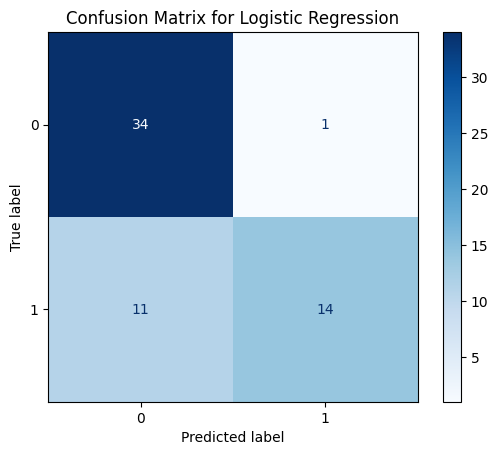



Model: KNN
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.97      0.78        35
           1       0.88      0.28      0.42        25

    accuracy                           0.68        60
   macro avg       0.76      0.63      0.60        60
weighted avg       0.75      0.68      0.63        60

AUC-ROC: 0.7445714285714286


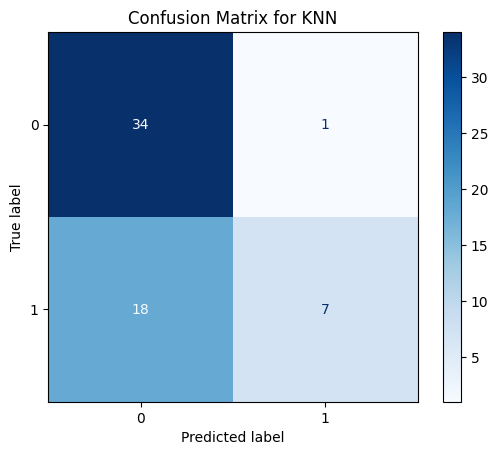



Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        35
           1       0.58      0.44      0.50        25

    accuracy                           0.63        60
   macro avg       0.62      0.61      0.61        60
weighted avg       0.63      0.63      0.62        60

AUC-ROC: 0.6057142857142856


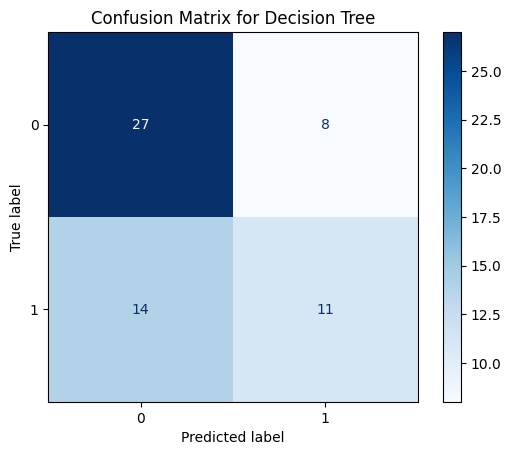



Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

AUC-ROC: 0.8274285714285715


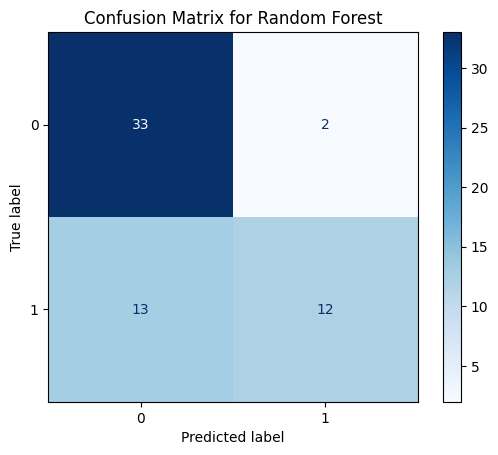



Model: SVM
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

AUC-ROC: 0.8160000000000001


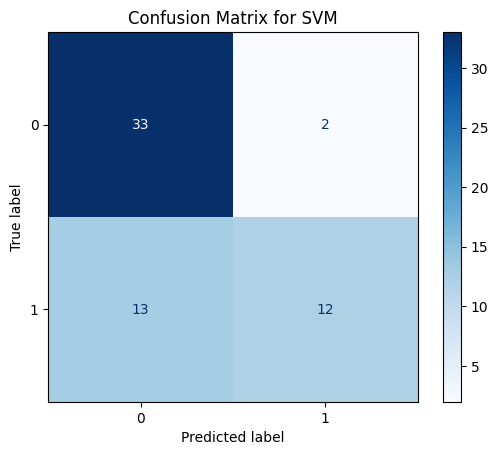

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Cross-validation accuracy for Logistic Regression: 0.78 (+/- 0.14)
Cross-validation accuracy for KNN: 0.62 (+/- 0.04)
Cross-validation accuracy for Decision Tree: 0.64 (+/- 0.17)
Cross-validation accuracy for Random Forest: 0.70 (+/- 0.15)
Cross-validation accuracy for SVM: 0.68 (+/- 0.01)


In [26]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"Model: {name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    if y_proba is not None:
        auc = roc_auc_score(y_test, y_proba)
        print(f"AUC-ROC: {auc}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    print("\n")

# Example of using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-validation accuracy for {name}: {scores.mean():.2f} (+/- {scores.std():.2f})")


##MODEL SELECTION

In [27]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression Hyperparameter Tuning
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='roc_auc')
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Evaluasi ulang dengan model terbaik
best_lr.fit(X_train, y_train)
y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]
print("Best Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_lr)}")

best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
print("Best Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_rf)}")

Best Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60

AUC-ROC: 0.8354285714285714
Best Random Forest:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        35
           1       0.87      0.52      0.65        25

    accuracy                           0.77        60
   macro avg       0.80      0.73      0.74        60
weighted avg       0.79      0.77      0.75        60

AUC-ROC: 0.8514285714285714


In [28]:
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='roc_auc')
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Evaluasi ulang dengan model terbaik (Logistic Regression)
best_lr.fit(X_train, y_train)
y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]
print("Best Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_lr)}")

# Evaluasi ulang dengan model terbaik (Random Forest)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
print("Best Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_rf)}")

Best Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60

AUC-ROC: 0.8354285714285714
Best Random Forest:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        35
           1       0.87      0.52      0.65        25

    accuracy                           0.77        60
   macro avg       0.80      0.73      0.74        60
weighted avg       0.79      0.77      0.75        60

AUC-ROC: 0.8514285714285714


# model prediksi

In [31]:
import numpy as np
import pandas as pd
import pickle

# Load saved model and scaler
model = pickle.load(open('penyakit_jantung.sav', 'rb'))
scaler = pickle.load(open('scaler.sav', 'rb'))

# Input data baru untuk prediksi
input_data = (60, 1, 315, 1, 60, 0, 454000, 1.1, 131, 1, 1, 10)

# Konversi input data menjadi numpy array dan reshape
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standarisasi input data
input_data_scaled = scaler.transform(input_data_reshaped)

# Prediksi
prediction = model.predict(input_data_scaled)
print(prediction)

# Interpretasi hasil prediksi
if prediction[0] == 0:
    print('Pasien tidak terkena penyakit jantung')
else:
    print('Pasien terkena penyakit jantung')

# Ambil data dari DataFrame
input_data_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
input_data_row = input_data_df.iloc[38].to_frame().T
print(input_data_row)

# Hapus kolom target
input_data_row = input_data_row.drop(columns=['DEATH_EVENT'])

# Standarisasi input data
input_data_scaled_df = scaler.transform(input_data_row)

# Prediksi
prediction_df = model.predict(input_data_scaled_df)
print(prediction_df)

# Interpretasi hasil prediksi
if prediction_df[0] == 0:
    print('Pasien tidak terkena penyakit jantung')
else:
    print('Pasien terkena penyakit jantung')


[0]
Pasien tidak terkena penyakit jantung
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
38  60.0      0.0                    2656.0       1.0               30.0   

    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
38                  0.0   305000.0               2.3         137.0  1.0   

    smoking  time  DEATH_EVENT  
38      0.0  30.0          0.0  
[0]
Pasien tidak terkena penyakit jantung


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
print(prediction[0])

0


# simpan model


In [33]:
import pickle

In [34]:
filename = 'penyakit_jantung.sav'
pickle.dump(model, open(filename, 'wb'))

In [35]:
filename = 'scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))

##KESIMPULAN

Berdasarkan evaluasi kinerja beberapa model klasifikasi pada dataset gagal jantung, Logistic Regression menunjukkan performa terbaik dengan akurasi tertinggi (0.80), F1-score terbaik untuk class 1 (0.70), dan AUC-ROC yang cukup tinggi (0.824). Random Forest memiliki AUC-ROC tertinggi (0.827) dan memberikan kinerja yang seimbang, menjadikannya pilihan cadangan yang kuat. Sementara itu, model KNN dan Decision Tree menunjukkan kinerja yang lebih rendah dibandingkan dengan Logistic Regression dan Random Forest. Oleh karena itu, Logistic Regression akan digunakan sebagai model utama dengan Random Forest sebagai alternatif cadangan.